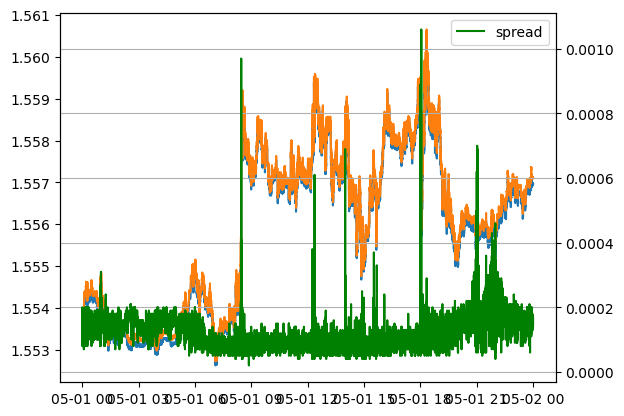

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import functools
import time


data = pd.read_csv('GBPUSD1d.txt', header=None, names=['date', 'bid', 'ask'], parse_dates=['date'], 
                 date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d%H%M%S'))
data['spread'] = data['ask'] - data['bid']

ax1 = plt.axes()

ax1.plot(data['date'], data['bid'], label = 'bid')
ax1.plot(data['date'], data['ask'], label = 'ask')

ax2 = ax1.twinx()
ax2.plot(data['date'], data['spread'], label = 'spread', color = 'g')

plt.grid()
plt.legend()
plt.show()



In [2]:
def percentChange(x, y):
    x = float(x)
    y = float(y)
    return ((y-x)/x) *100

def patternFinder():
    avgLine = (data['bid']+data['ask'])/2
    x = len(avgLine) - 30
    
    y = 11
    while y < x:
        p = [percentChange(avgLine[y-10], avgLine[y-i]) for i in range(9,-1,-1)]
        
        outcomeRange = avgLine[y+20: y+30]
        currentPoint = avgLine[y]
    
        print(functools.reduce(lambda x, y: x+y, outcomeRange)/len(outcomeRange))
        print(currentPoint)
        print('____')
        y +=1
        print(p)
        break
        

In [3]:
patternFinder()

1.553601
1.553555
____
[-0.001930961683282023, -0.0032182694721319405, -0.0032182694721319405, -0.0035400964193622853, -0.003861923366564046, -0.005471058102644308, -0.0061147119970621205, -0.00450557726099615, -0.00450557726099615, -0.004827404208212203]
